# Information Retrieval and Web Search
<p>
Course Project - Clustering documents to compress inverted index<br>
Giovanni Costa - 880892
</p>

In [1]:
import numpy as np
import json
import multiprocessing
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

from sklearn.datasets import fetch_rcv1
from utils import random_search, plot_results
from Indexer import Indexer

input_path="input/"
output_path="output/"
CORE_NUM=multiprocessing.cpu_count()
np.random.seed(42)

## Data fetching and index building

In [ ]:
sparse_docs, _=fetch_rcv1(return_X_y=True) #TF-IDF matrix
sparse_docs=sparse_docs.astype("float32")
print("TF-IDF info:")
print("Shape: ", sparse_docs.shape)
print("Size: {:.3f} MB".format(sparse_docs.data.nbytes/ (1024**2)))

In [ ]:
std_inverted_index=Indexer.get_dict_from_csr_matrix(sparse_docs) #build the inverted index from sparse matrix

## MiniBatch K-Means Method

In [ ]:
n_iter=50
param_list=[i for i in range(2, 151)]
params_k_means={"n_clusters": param_list}
k_means_obj=MiniBatchKMeans(batch_size=512*CORE_NUM, n_init="auto") #For faster computations, you can set the batch_size greater than 256 * number of cores to enable parallelism on all cores

In [ ]:
best_k_means, best_k_means_remapping, log_dict_kmeans=random_search(k_means_obj, sparse_docs, std_inverted_index, params_k_means, n_iter, True)

In [ ]:
with open(output_path+"log_dict_kmeans.json", "w") as file:
    json.dump(log_dict_kmeans, file)

## Gaussian Mixture method

In [ ]:
n_iter=50
param_list=[i for i in range(2, 151)]
params_mixture={"n_components": param_list}
mixture_obj=GaussianMixture(covariance_type="diag", init_params='k-means++')

In [ ]:
best_mixture, best_mixture_remapping, log_dict_mixture=random_search(mixture_obj, sparse_docs, std_inverted_index, params_mixture, n_iter, True)

In [ ]:
with open(output_path+"log_dict_mixture.json", "w") as file:
    json.dump(log_dict_mixture, file)

## Results

In [2]:
log_dict_kmeans=None
log_dict_mixture=None
with open(output_path+"log_dict_kmeans.json") as f1, open(output_path+"log_dict_mixture.json") as f2:
    log_dict_kmeans=json.load(f1)
    log_dict_mixture=json.load(f2)

### MiniBatch K-Means

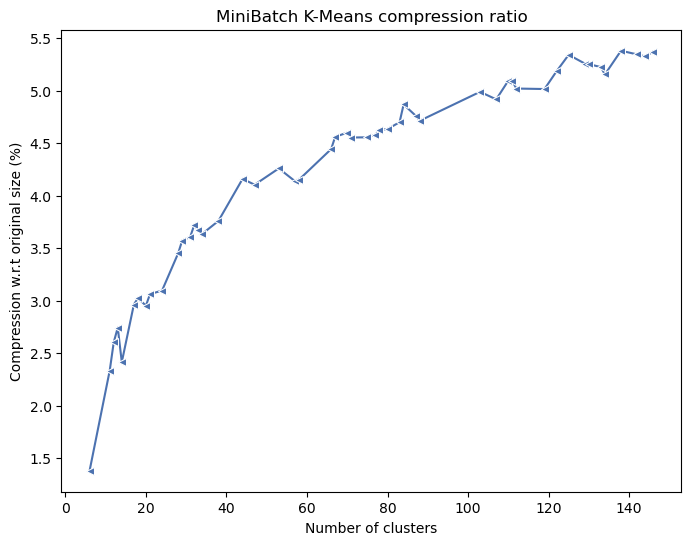

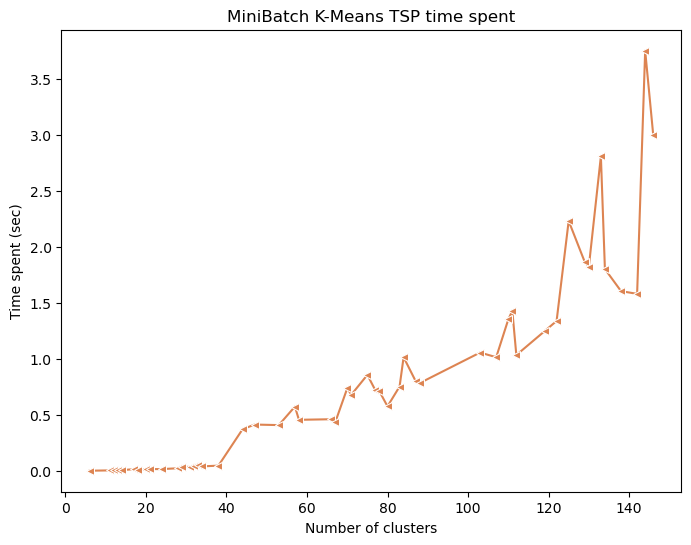

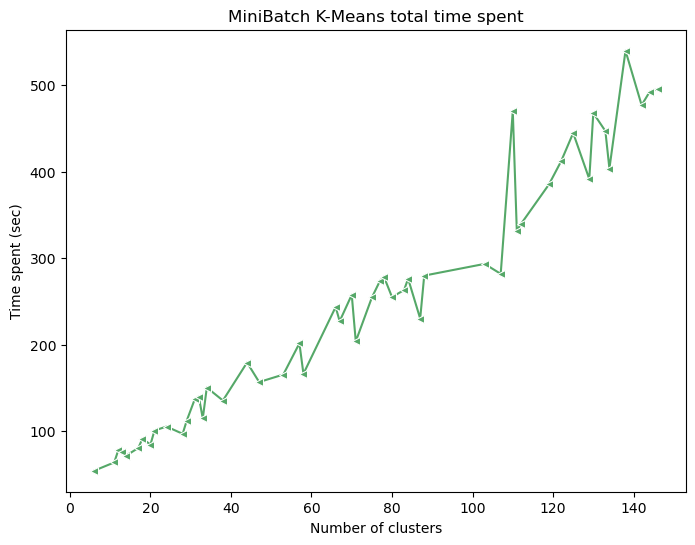

Worst compression - params:  6  value:  1.3796  TSP time:  0.0058  tot time:  54.3861
Best compression - params:  138  value:  5.3791  TSP time:  1.6085  tot time:  539.5912


In [3]:
plot_results(log_dict_kmeans, "MiniBatch K-Means")

### Gaussian Mixture

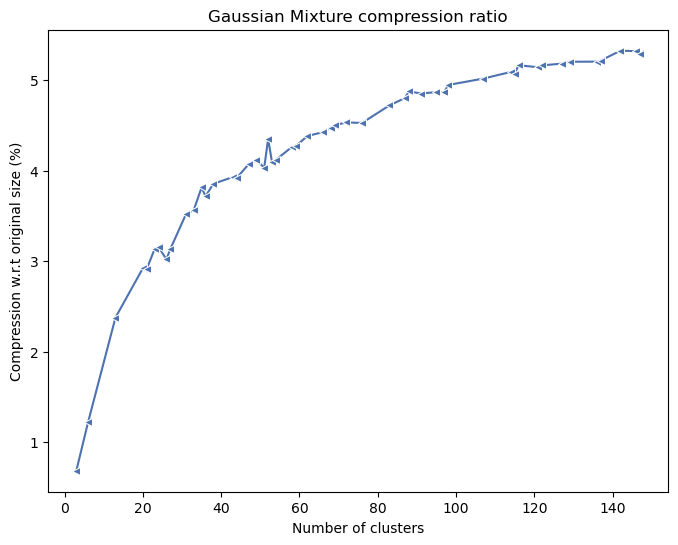

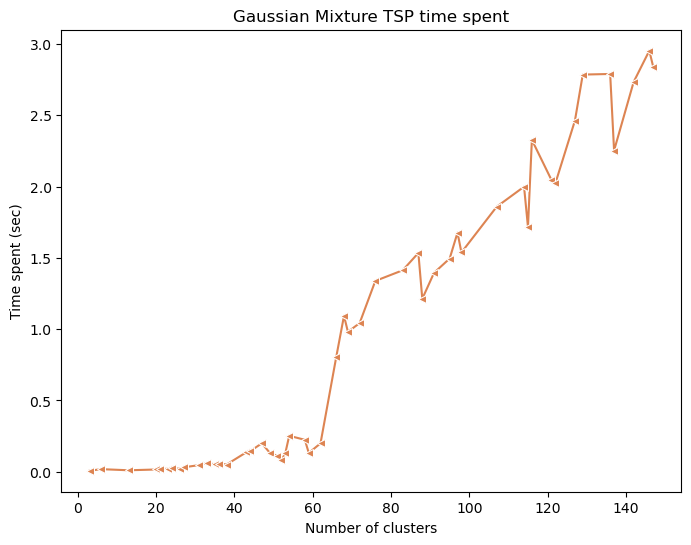

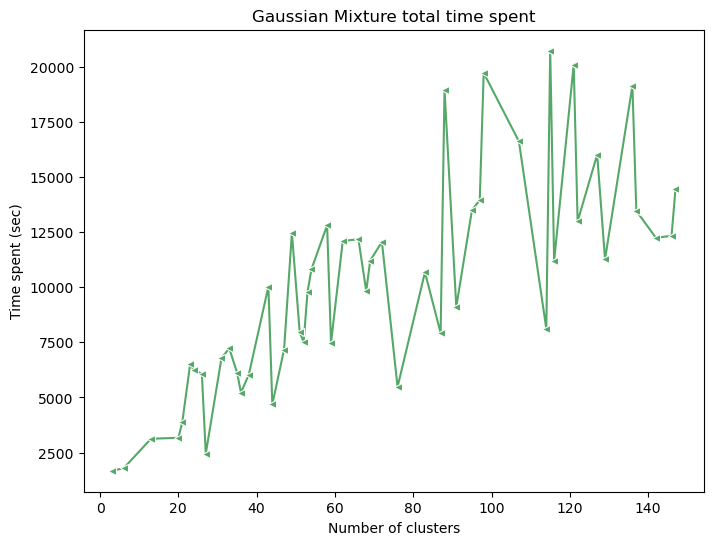

Worst compression - params:  3  value:  0.6872  TSP time:  0.0072  tot time:  1678.0203
Best compression - params:  142  value:  5.3238  TSP time:  2.7344  tot time:  12243.7066


In [4]:
plot_results(log_dict_mixture, "Gaussian Mixture")